In [3]:
# use packages
using CDSAPI
using NCDatasets
using PyPlot
using Dates

In [4]:
# get cartopy -- broken
#=
using PyCall

ccrs = pyimport("cartopy.crs")
feature = pyimport("cartopy.feature")
=#

# pygui(:tk)

# use cartopy to make plots with maps -- downloads fail
# cartopy is broken
# ax = subplot(projection=ccrs.Orthographic(65, 13))
# ax = subplot(projection=ccrs.PlateCarree())
# ax.coastlines()
# ax.add_feature(feature.OCEAN, color="navy")
# ax.add_feature(feature.LAND, color="lightgray")

In [12]:
# download ERA5 data from Copernicus Climate Data Store CDS API

# daystrings(x) = @sprintf("%02d",x)
#=
python format list of days this way:
["{:02d}".format(x) for x in range(1, 31+1)]

    [ '01', '02', '03', '04', '05', '06',
            			      '07', '08', '09', '10', '11', '12',
            			      '13', '14', '15', '16', '17', '18',
            			      '19', '20', '21', '22', '23', '24',
            			      '25', '26', '27', '28', '29', '30',
            			      '31',],
=#

req = CDSAPI.py2ju("""
                         {
                             'product_type': 'reanalysis',
                             'format': 'netcdf',
                             'area': [30, 40, -4, 90],
                             'time': '00:00',
                             'month': [ '05', '06' ],
                             'day':     [ '01', '02', '03', '04', '05', '06',
            			      '07', '08', '09', '10', '11', '12',
            			      '13', '14', '15', '16', '17', '18',
            			      '19', '20', '21', '22', '23', '24',
            			      '25', '26', '27', '28', '29', '30',
            			      '31',],
                             'year': ['2018', '2019', '2020', '2021', '2022'],
                             'pressure_level': [ '850', '1000'],
                             'variable': [ 'divergence', 'fraction_of_cloud_cover', 'geopotential',
                                 'potential_vorticity', 'specific_humidity', 'temperature',
                                 'u_component_of_wind', 'v_component_of_wind', 'vertical_velocity',
                                 'vorticity'],
                         }
                         """)

# download commented out
r = CDSAPI.retrieve( "reanalysis-era5-pressure-levels", req , "era5_as_850_1000.nc" ) # saves data in .nc

┌ Debug: try_with_timeout finished with: nothing
└ @ HTTP.Exceptions ~/.julia/packages/HTTP/z8l0i/src/Exceptions.jl:55
┌ Debug: POST /api/v2/resources/reanalysis-era5-pressure-levels HTTP/1.1
└ @ HTTP.StreamRequest ~/.julia/packages/HTTP/z8l0i/src/clientlayers/StreamRequest.jl:24
┌ Debug: HTTP/1.1 202 Accepted <= (POST /api/v2/resources/reanalysis-era5-pressure-levels HTTP/1.1)
└ @ HTTP.StreamRequest ~/.julia/packages/HTTP/z8l0i/src/clientlayers/StreamRequest.jl:71


request queue status queued
request queue status running
request queue status running
request queue status running
request queue status running
request queue status running
request queue status running
request queue status running
request queue status running
request queue status running
request queue status running
request queue status completed


┌ Info: Downloading
│   source = "https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1680584318.4891908-8708-16-edf16e9b-66ae-423e-986e-831253cc68c1.nc"
│   dest = "era5_as_850_1000.nc"
│   progress = 0.0003
│   time_taken = "1.04 s"
│   time_remaining = "3315.51 s"
│   average_speed = "98.923 KiB/s"
│   downloaded = "103.177 KiB"
│   remaining = "320.294 MiB"
└   total = "320.394 MiB"
┌ Info: Downloading
│   source = "https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/adaptor.mars.internal-1680584318.4891908-8708-16-edf16e9b-66ae-423e-986e-831253cc68c1.nc"
│   dest = "era5_as_850_1000.nc"
│   progress = 0.0007
│   time_taken = "2.09 s"
│   time_remaining = "3052.16 s"
│   average_speed = "107.419 KiB/s"
│   downloaded = "224.720 KiB"
│   remaining = "320.175 MiB"
└   total = "320.394 MiB"
┌ Info: Downloading
│   source = "https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data2/ad

Dict{String, Any} with 7 entries:
  "sent_to_rmq_at"         => "2023-04-04T04:55:18.83Z"
  "location"               => "https://download-0007-clone.copernicus-climate.e…
  "content_type"           => "application/x-netcdf"
  "request_id"             => "edf16e9b-66ae-423e-986e-831253cc68c1"
  "specific_metadata_json" => Dict{String, Any}("top_request_origin"=>"api")
  "content_length"         => 335957812
  "state"                  => "completed"

In [13]:
##
# plot data from local copy
ds = NCDatasets.Dataset("era5_as_850_1000.nc")

# test contour vorticity at 850 hPa
# contour(ds["longitude"][:], ds["latitude"][:], ds["vo"][:,:,1,1]')

NCDataset: era5_as_850_1000.nc
Group: /

Dimensions
   longitude = 201
   latitude = 137
   level = 2
   time = 305

Variables
  longitude   (201)
    Datatype:    Float32
    Dimensions:  longitude
    Attributes:
     units                = degrees_east
     long_name            = longitude

  latitude   (137)
    Datatype:    Float32
    Dimensions:  latitude
    Attributes:
     units                = degrees_north
     long_name            = latitude

  level   (2)
    Datatype:    Int32
    Dimensions:  level
    Attributes:
     units                = millibars
     long_name            = pressure_level

  time   (305)
    Datatype:    Int32
    Dimensions:  time
    Attributes:
     units                = hours since 1900-01-01 00:00:00.0
     long_name            = time
     calendar             = gregorian

  d   (201 × 137 × 2 × 305)
    Datatype:    Int16
    Dimensions:  longitude × latitude × level × time
    Attributes:
     scale_factor         = 1.6874663189908273e-8
 

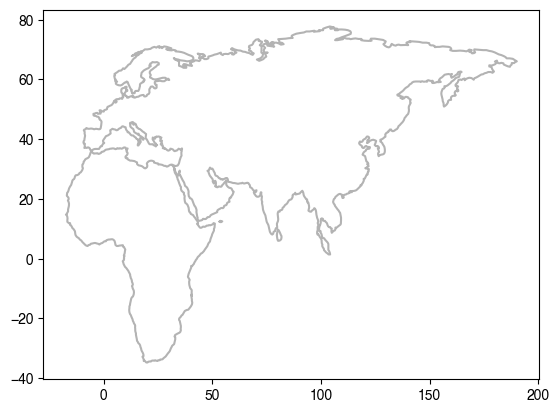

In [14]:
# use coasts.mat to plot land outlines
using MAT
coast = matread("coast.mat")
# separate landmasses into individual index ranges
ibnd = [0; findall(isnan.(coast["lat"][:]) .&& isnan.(coast["long"][:])); length(coast["lat"])+1]
rng = [ ibnd[k]+1 : ibnd[k+1]-1 for k in 1:length(ibnd)-1] # vector of landmass ranges

"filter only index ranges for landmasses in a lon-lat box"
function rng_in_lonlatbox(rng, lon, lat, lon0, lon1, lat0, lat1)
    flt(rng) = any(lon0.<lon[rng].<lon1 .&& lat0.<lat[rng].<lat1)
    return filter(flt, rng)
end

"plot regional coastlines"
function ascoast!(ax, asrng )
    for r in asrng
        ax.plot(coast["long"][r], coast["lat"][r], color=0.7.*[1 1 1])
    end
end

# plot outlines of 4 Arabian Sea landmasses
asrng = rng_in_lonlatbox( rng, coast["long"][:], coast["lat"][:],  40,90 , -4,30 )
ax = subplot(1,1,1)
ascoast!(ax, asrng)

In [39]:
ds

NCDataset: era5_as_850_1000.nc
Group: /

Dimensions
   longitude = 201
   latitude = 137
   level = 2
   time = 305

Variables
  longitude   (201)
    Datatype:    Float32
    Dimensions:  longitude
    Attributes:
     units                = degrees_east
     long_name            = longitude

  latitude   (137)
    Datatype:    Float32
    Dimensions:  latitude
    Attributes:
     units                = degrees_north
     long_name            = latitude

  level   (2)
    Datatype:    Int32
    Dimensions:  level
    Attributes:
     units                = millibars
     long_name            = pressure_level

  time   (305)
    Datatype:    Int32
    Dimensions:  time
    Attributes:
     units                = hours since 1900-01-01 00:00:00.0
     long_name            = time
     calendar             = gregorian

  d   (201 × 137 × 2 × 305)
    Datatype:    Int16
    Dimensions:  longitude × latitude × level × time
    Attributes:
     scale_factor         = 1.6874663189908273e-8
 

In [55]:
var="z"
ds[var].attrib["units"]

"m**2 s**-2"

In [ ]:
# plot the variable
function plotas!(ax, var, level=1, time=31)
    ct = ax.contour(ds["longitude"][:], ds["latitude"][:], ds[var][:,:,level,time]', 14200:40:14800, vmin=14200, vmax=14800)
    return ct
end

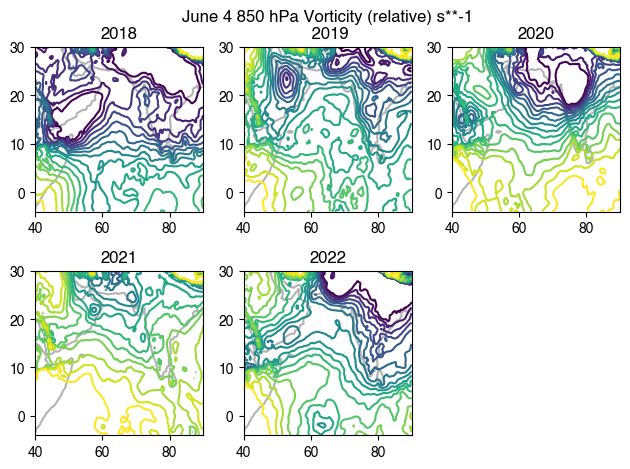

In [21]:
# plot 5 years of Z850
clf()
level = 1
for i = 1:5
    ax = subplot(2,3, i)
    ax.set_xlim(40, 90)
    ax.set_ylim(-4, 30)
    ascoast!( ax, asrng )
    
    year = i-1
    time = year*(31+30)+31+4 # June 4s
    ct = plotas!( ax, "z", level, time )
    i == 5 && ct.colorbar
    # colorbar(ct)
    if i == 2
        ax.set_title( "$(Dates.format(ds["time"][time], "U d")) $(ds["level"][level]) hPa $(ds[var].attrib["long_name"]) $(ds[var].attrib["units"])\n $(Dates.year(ds["time"][time]))" )
    else
        ax.set_title( "$(Dates.year(ds["time"][time]))" )
    end
end
tight_layout()

In [35]:
# plot 5 years of vorticity at 850 hPa

level = 1
var = "vo"

clf()
for i = 1:5
    ax = subplot(2,3, i)
    ax.set_xlim(40, 90)
    ax.set_ylim(-4, 30)
    ascoast!( ax, asrng )
    
    year = i-1
    time = year*(31+30)+31+4 # June 4s
    ct = ax.contourf(ds["longitude"][:], ds["latitude"][:], 
          ds[var][:,:,level,time]', -1.5e-4:3e-5:3e-4,
        cmap = ColorMap("RdBuYl_r")) #, 16, vmin=-1.5e-4, vmax=1.5e4)
    i == 5 && colorbar(ct)
    # colorbar(ct)
    if i == 2
        ax.set_title( "$(Dates.format(ds["time"][time], "U d")) $(ds["level"][level]) hPa $(ds[var].attrib["long_name"]) $(ds[var].attrib["units"])\n $(Dates.year(ds["time"][time]))" )
    else
        ax.set_title( "$(Dates.year(ds["time"][time]))" )
    end
end
tight_layout()

LoadError: UndefVarError: cmap not defined